In [1]:
pip install C:\Users\pietr\Library\dist\Library-0.1.0-py3-none-any.whl

Processing c:\users\pietr\library\dist\library-0.1.0-py3-none-any.whl
Library is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.


In [31]:
# Import Module
import os
import pandas as pd
import numpy as np
import MyDictLib
from MyDictLib import BusinessDictLib
from wordcloud import WordCloud
import PyPDF2
from pathlib import Path
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import gensim
import gensim.corpora as corpora
from array import array
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 
import spacy
from matplotlib import pyplot as plt
from collections import Counter
import fitz
import nltk
from nltk import ngrams
from nltk.stem.wordnet import WordNetLemmatizer


In [3]:
print(BusinessDictLib.forbidden_words_ner)

('WAF', 'Kramme', 'DAM', 'Social Security', 'SEC', 'U.S. Appl.', 'the European Patent Office', 'ID Analytics, Inc.', 'the Social Security Administration', 'NAS', 'USPTO', 'IEEE')


Preparation phase in which correct patents are chosen

In [4]:
# Folder Path 
path =r"C:\Users\edoar\Desktop\Business And Project Management Project\AI_patents_2020_2021_claim"
# Change the directory
os.chdir(path)
arr = []
fp = []
i = -1
count_fraud = []
count_IA = []
count_Med = []

# iterate through all file and count occurrences of pre-defined words
for file in os.listdir():
    i = i+1
    foundFraud = False
    foundFraud_s = False
    foundIA = False
    foundMed = False
    count_fraud.append(0)
    count_IA.append(0)
    count_Med.append(0)
    arr.append(0)
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}\\{file}"
        # opening the text file
        with open(file_path ,encoding="utf-8") as file:
            # reading each line	
            for line in file:
                # reading each word		
                for word in line.split():
                    # count how many words of interest appears in each patent
                    if word in BusinessDictLib.dict_array_fraud_s:
                        foundFraud_s = True
                    if word in BusinessDictLib.dict_array_fraud:
                        foundFraud = True
                        count_fraud[i] = count_fraud[i] + 1
                    if word in BusinessDictLib.dict_array_IA:
                        foundIA = True
                        count_IA[i] = count_IA[i] + 1
                    if word in BusinessDictLib.dict_array_med:
                        foundMed = True
                        count_Med[i] = count_Med[i] + 1
    if (foundFraud_s or foundFraud) and foundIA and not foundMed :
        arr[i] = arr[i] + 1
        if count_fraud[i] < 3 and count_IA[i] < 3 and foundFraud_s == False:
            fp.append(i)


In [5]:
#create list of patents which could be True Positives or False Positives
j = -1
k = -1
lista_patent_interessanti = [] 
for i in range (0, len(arr)):
    j +=1
    if arr[i]!=0:
        k +=1
        lista_patent_interessanti.append(j)
        if i in fp:
            print(f'{k}-th patent is a false positive candidate, check its title.')



15-th patent is a false positive candidate, check its title.
41-th patent is a false positive candidate, check its title.
43-th patent is a false positive candidate, check its title.
52-th patent is a false positive candidate, check its title.
54-th patent is a false positive candidate, check its title.
73-th patent is a false positive candidate, check its title.


In [6]:
#boolean variable to indicate that the tag "<title>" was found
salva = False
titoli=[]

iterazione = -1
j = 0
# iterate through all file and exploit the structure of patents to save titles
for file in os.listdir():
    iterazione = iterazione+1
    if(iterazione == lista_patent_interessanti[j]):
        titolo = ""
        # Check whether file is in text format or not
        if file.endswith(".txt"):
            file_path = f"{path}\\{file}"
            # opening the text file
            with open(file_path ,encoding="utf-8") as file:
                # reading each line	
                for line in file:
                    # reading each word		
                    for word in line.split():
                        if(word == "<title>"):
                            salva = True
                        if salva == True:
                            titolo = titolo +" "+ word
                        if (word == "</title>"):
                            salva = False
                            titoli.append(titolo)
        if(j<len(lista_patent_interessanti)-1):
            j = j+1
        else:
            break
            
#remove the tags from the saved titles
i = 0
for titolo in titoli:
    print(str(i) + titolo.split('<title>')[1].split('</title>')[0])
    i+=1

0 SUBSTITUTE CURRENCY FOR GAMING, INSPECTION DEVICE, AND MANUFACTURING METHOD OF SUBSTITUTE CURRENCY FOR GAMING, AND MANAGEMENT SYSTEM FOR TABLE GAMES 
1 IDENTIFYING AND USING DNS CONTEXTUAL FLOWS 
2 FRAUD DETECTION SYSTEM AT GAME PARLOR 
3 SYSTEM AND METHOD OF MANAGING COMPUTING RESOURCES FOR DETECTION OF MALICIOUS FILES BASED ON MACHINE LEARNING MODEL 
4 VISUAL COMPARISON PLATFORM FOR MALICIOUS SITE DETECTION 
5 EXTRACTING MALICIOUS INSTRUCTIONS ON A VIRTUAL MACHINE IN A NETWORK ENVIRONMENT 
6 REACTIVE AND PRE-EMPTIVE SECURITY SYSTEM FOR THE PROTECTION OF COMPUTER NETWORKS & SYSTEMS 
7 Hierarchical profiling inputs and self-adaptive fraud detection system 
8 Optimizing a malware detection model using hyperparameters 
9 Classifying software scripts utilizing deep learning networks 
10 Computer security and usage-analysis system 
11 Risk-based machine learning classsifier 
12 Learned profiles for malicious encrypted network traffic identification 
13 Adaptive, multi-modal fraud detecti

In [7]:
#perform False Positives check
trueFPlist= []

#iterate the titles to find the not related patents
for i in fp:
    for j in range(len(lista_patent_interessanti)):
        titleRelated = False
        if i == lista_patent_interessanti[j]:
            for word in titoli[j].split():
                if (word in BusinessDictLib.dict_related_titles):
                    
                    titleRelated = True
                    break
            if titleRelated == False:
                    trueFPlist.append(i)
                    
#remove from the list the titles which has been discovered to be False Positives
for i in lista_patent_interessanti:
    for j in trueFPlist :
        if i == j :
            lista_patent_interessanti.remove(i)
            
        

Now we focus on observing the trend over time of the patents

In [8]:
salva = False
date=[]

iterazione = -1
j = 0
# iterate through all file to save the dates of chosen patents exploiting patent's structure
for file in os.listdir():
    iterazione = iterazione+1
    if(iterazione == lista_patent_interessanti[j]):
        data = ""
        # Check whether file is in text format or not
        if file.endswith(".txt"):
            file_path = f"{path}\\{file}"
            # opening the text file
            with open(file_path ,encoding="utf-8") as file:
                # reading each line	
                for line in file:
                    # reading each word		
                    for word in line.split():
                        if(word == "<filing_date>"):
                            salva = True
                        if salva == True:
                            data = data +" "+ word
                        if (word == "</filing_date>"):
                            salva = False
                            date.append(data)
        if(j<len(lista_patent_interessanti)-1):
            j = j+1
        else:
            break
            

In [9]:
#keeping only the year
dates = []
for data in date:
    dates.append((data.split()[1]).split('-')[0])

In [10]:
print(dates)

['2016', '2017', '2016', '2018', '2020', '2016', '2017', '2017', '2016', '2017', '2016', '2019', '2016', '2017', '2017', '2019', '2018', '2018', '2017', '2018', '2017', '2015', '2018', '2016', '2019', '2015', '2018', '2018', '2016', '2018', '2019', '2018', '2018', '2017', '2017', '2019', '2018', '2020', '2018', '2019', '2019', '2018', '2019', '2018', '2020', '2018', '2019', '2020', '2020', '2019', '2020', '2020', '2020', '2019', '2020', '2020', '2020', '2020', '2019', '2019', '2020', '2020', '2020', '2020', '2019', '2020', '2020', '2019', '2019', '2019', '2020']


In [11]:
#counting patents for each year
i = 0
count = [0, 0, 0, 0, 0, 0, 0]
for data in dates:
    i+=1
    if(data == "2014"):
        count[0]+=1
    if(data == "2015"):
        count[1]+=1
    if(data == "2016"):
        count[2]+=1
    if(data == "2017"):
        count[3]+=1
    if(data == "2018"):
        count[4]+=1
    if(data == "2019"):
        count[5]+=1
    if(data == "2020"):
        count[6]+=1

for i in range(len(count)):
    print(str(2014+i) + ": " + str(count[i]))

2014: 0
2015: 2
2016: 8
2017: 10
2018: 15
2019: 17
2020: 19


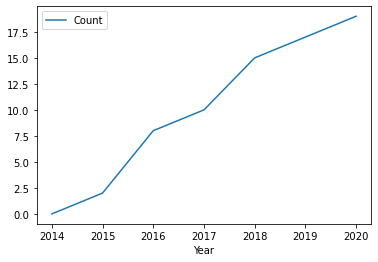

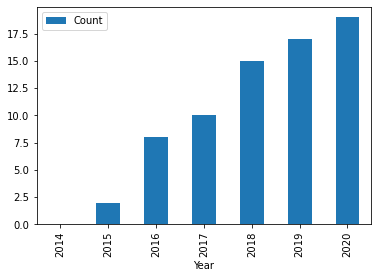

In [12]:
#plot the trend over the years

df= pd.DataFrame({"Year": range(7), "Count" :range(7)})
for i in range(7):
    df.Year[i] = 2014 + i
    df.Count[i] = count[i]
    
df.plot(x ='Year', y='Count', kind = 'line') 
plt.show()

df.plot(x ='Year', y='Count', kind = 'bar') 
plt.show()

In [13]:
# Read text File
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        print(f.read())

In [14]:
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

In [15]:
list_text = [] 
i = 0
iterazione = -1
j = 0
# iterate through the selected patents and saves the texts in a list
for file in os.listdir():
    iterazione +=1
    if(iterazione == lista_patent_interessanti[j]):
        if file.endswith(".txt"):
            file_path = f"{path}\\{file}"
            input_file = open(file_path, encoding="utf8")
            file_text = cleanhtml(input_file.read())
            list_text.append(file_text)
        if(j<len(lista_patent_interessanti)-1):
            j = j+1
        else:
            break

In [16]:
# transform the texts to lower case
list_text_low = []
for text in list_text:
    list_text_low.append(text.lower())

In [ ]:
# we define a function to remove extra spaces. It uses the split() function to divide a string into words by deleting
# spaces. Then, re-join the string together separating words with single spaces.

def remove_whitespace(text):
    return  " ".join(text.split())

list_text_low_removeSpace = []
for text in list_text_low:
    list_text_low_removeSpace.append(remove_whitespace(text))

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pietr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# for each document create the list of tokens
list_tokenized_test = []
for text in list_text_low_removeSpace:
    list_tokenized_test.append(nltk.word_tokenize(text))


In [20]:
list_text_string_per_year = [""]*len(list(set(dates))) #list of length equal to the different years of the patents

#merge together texts of patents of the same year

for j in range(len(list_text_string_per_year)):
    for i in range(len(dates)):
        if(dates[i] == str(2016 + j)):
            list_text_string_per_year[j] = list_text_string_per_year[j] + " " + list_text_low_removeSpace[i]
list_most_occurent_word_per_year = []


for text in list_text_string_per_year:
    data_set = text
    split_it = data_set.split()
    CounterVariable  = Counter(split_it)
    # most_common() produces k frequently encountered
    # input values and their respective counts.
    most_occur = CounterVariable.most_common(450)
    list_most_occurent_word_per_year.append(most_occur)

In [21]:
stopwords_en = stopwords.words('english')
for item in BusinessDictLib.forbidden_words_cloud:
    stopwords_en.append(item)

In [22]:
# we prepare a empty list of lists, which will contain the words after the stopwords removal for each document
list_tokenized_text_2 = [] 

# we iterate into the list of tokens obtained through the tokenization
for tokenized_text in list_tokenized_test:
    tmp = []
    for token in tokenized_text:
        # if a token is not a stopword, we insert it in the list
        if token not in stopwords_en:
            tmp.append(token)
    list_tokenized_text_2.append(tmp)

In [23]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pietr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [24]:
pos_tagging_list = []

for tokenized_text_2 in list_tokenized_text_2:
    pos_tagging_list.append(nltk.pos_tag(tokenized_text_2))

In [25]:
list_cleaned_POS_text = [] #list of lists

for pos_tagging in pos_tagging_list:
    tmp = []
    for tuple in pos_tagging:
        # POS tagged text is a list of tuples for each document, where the first element tuple[0] is a token and the second one tuple[1] is
        # the Part of Speech. If the POS has length == 1, the token is punctuation, otherwise it is not, and we insert it
        # in the list cleaned_POS_text
        if len(tuple[1]) > 1:
            tmp.append(tuple)
    list_cleaned_POS_text.append(tmp)

In [26]:
def simpler_pos_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return "a"
    elif nltk_tag.startswith('V'):
        return "v"
    elif nltk_tag.startswith('N'):
        return "n"
    elif nltk_tag.startswith('R'):
        return "r"
    else:         
        return None
    
list_simpler_POS_text = []

# for each tuple of the list, we create a new tuple: the first element is the token, the second is
# the simplified pos tag, obtained calling the function simpler_pos_tag()
# then we append the new created tuple to a new list, which will be the output
for cleaned_POS_text in list_cleaned_POS_text:
    tmp = []
    for tuple in cleaned_POS_text:
        POS_tuple = (tuple[0], simpler_pos_tag(tuple[1]))
        tmp.append(POS_tuple)
    list_simpler_POS_text.append(tmp)

In [27]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pietr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
list_lemmatized_text = []
tmp = []
for simpler_POS_text in list_simpler_POS_text:
    for tuple in simpler_POS_text:
        if (tuple[1] == None):
            tmp.append(lemmatizer.lemmatize(tuple[0]))
        else:
            tmp.append(lemmatizer.lemmatize(tuple[0], pos=tuple[1]))
    list_lemmatized_text.append(tmp)


In [29]:
stemmer = PorterStemmer()

In [30]:
list_stem_text = []

for simpler_POS_text in list_simpler_POS_text:
    tmp = []
    for tuple in simpler_POS_text:
        tmp.append(stemmer.stem(tuple[0]))
    list_stem_text.append(tmp)

In [32]:
list_text_string = []

for stem_text in list_stem_text:
    text_tmp =  ' '.join([str(elem) for elem in stem_text])
    list_text_string.append(text_tmp)

In [33]:
# variable dates contains the list of dates of each patent 
# variable list_text_string contains the preprocessed text of each patent of interest

list_text_string_per_year = [""]*len(list(set(dates)))  #list of length equal to the different years of the patents

for j in range(len(list_text_string_per_year)):
    for i in range(len(dates)):
        if(dates[i] == str(2016 + j)):
            list_text_string_per_year[j] = list_text_string_per_year[j] + " " + list_text_string[i]


In [34]:
# Python program to find the k most frequent words
# from the collection of patents of each year

list_most_occurent_word_per_year = []

from collections import Counter

for text in list_text_string_per_year:
    data_set = text
    split_it = data_set.split()
    CounterVariable  = Counter(split_it)
    # most_common() produces k frequently encountered
    # input values and their respective counts.
    most_occur = CounterVariable.most_common(8)
    list_most_occurent_word_per_year.append(most_occur)
    print(most_occur)


[('machin', 144), ('virtual', 124), ('model', 106), ('file', 96), ('metadata', 92), ('devic', 90), ('detect', 88), ('object', 86)]
[('data', 227), ('user', 149), ('model', 130), ('modul', 120), ('campaign', 109), ('detect', 102), ('system', 101), ('token', 101)]
[('system', 393), ('first', 322), ('second', 230), ('data', 198), ('featur', 188), ('detect', 186), ('devic', 179), ('comput', 173)]
[('data', 303), ('set', 261), ('network', 229), ('first', 205), ('applic', 165), ('system', 157), ('train', 146), ('second', 140)]
[('data', 321), ('devic', 232), ('system', 211), ('comput', 197), ('network', 153), ('imag', 146), ('action', 138), ('set', 137)]
[]


In [35]:
# convert a list to dictionary

def Convert(lst):
    res_dct = {lst[i][0]: lst[i][1] for i in range(0, len(lst))}
    return res_dct

dict_years = []
for i in range(len(list_most_occurent_word_per_year)):
    dict_years.append(Convert(list_most_occurent_word_per_year[i]))

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

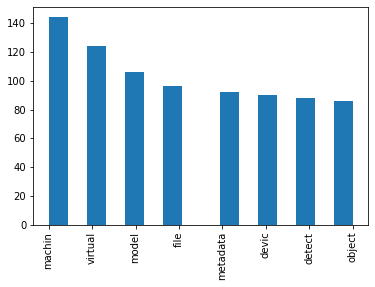

In [36]:
mylist = [key for key, val in dict_years[0].items() for _ in range(val)]
plt.hist(mylist, bins=16)
plt.xticks(rotation=90)

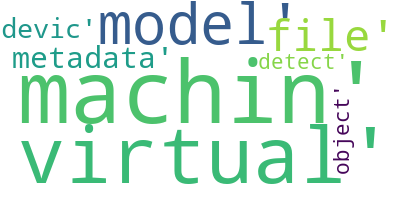

In [37]:
text0 = ' '.join([str(elem) for elem in dict_years[0].items()])
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(text0)
wordcloud.to_image()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

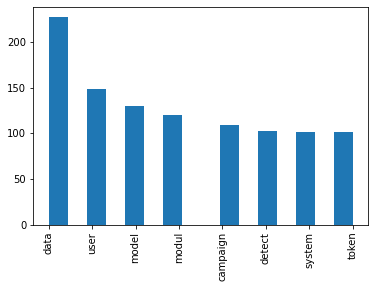

In [38]:
mylist = [key for key, val in dict_years[1].items() for _ in range(val)]
plt.hist(mylist, bins=16)
plt.xticks(rotation=90)

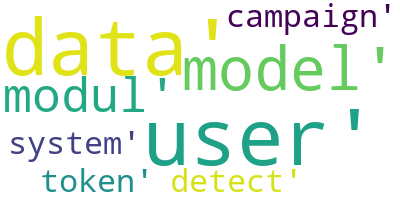

In [39]:
text1 = ' '.join([str(elem) for elem in dict_years[1].items()])
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(text1)
wordcloud.to_image()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

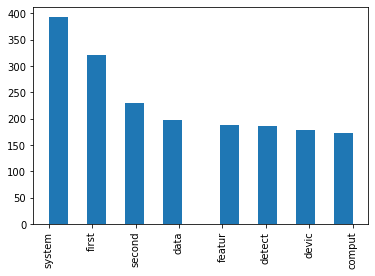

In [40]:
mylist = [key for key, val in dict_years[2].items() for _ in range(val)]
plt.hist(mylist, bins=16)
plt.xticks(rotation=90)

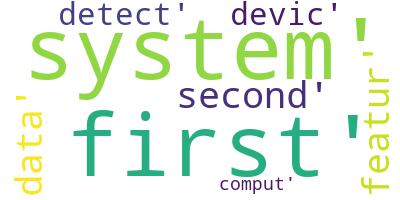

In [41]:
text2 = ' '.join([str(elem) for elem in dict_years[2].items()])
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(text2)
wordcloud.to_image()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

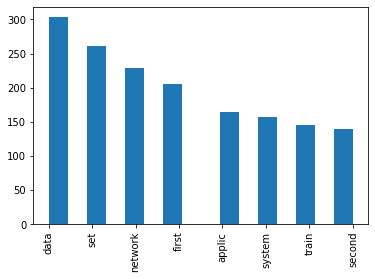

In [42]:
mylist = [key for key, val in dict_years[3].items() for _ in range(val)]
plt.hist(mylist, bins=16)
plt.xticks(rotation=90)

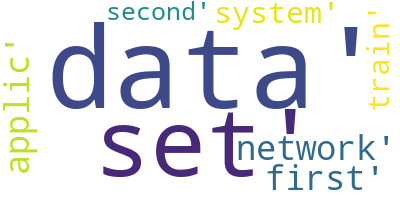

In [43]:
text3 = ' '.join([str(elem) for elem in dict_years[3].items()])
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(text3)
wordcloud.to_image()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

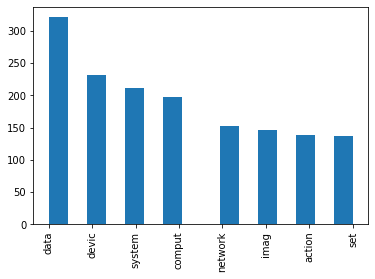

In [44]:
mylist = [key for key, val in dict_years[4].items() for _ in range(val)]
plt.hist(mylist, bins=16)
plt.xticks(rotation=90)

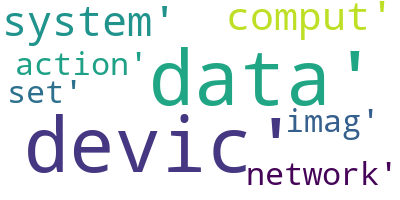

In [45]:
text4 = ' '.join([str(elem) for elem in dict_years[4].items()])
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(text4)
wordcloud.to_image()

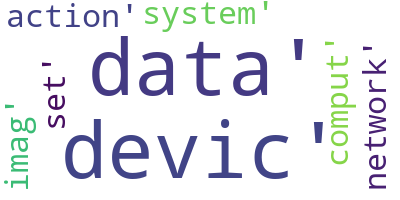

In [46]:
text4 = ' '.join([str(elem) for elem in dict_years[4].items()])
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(text4)
wordcloud.to_image()

now we focus on finding the main topics of the selected patents and other patents from google patents

In [47]:
# we add 30 patents from google patents, those ones were selected by hand so they don't have to be checked for
# false positives

In [48]:
# transforming into .txt patents from internet

path =r"C:\Users\edoar\Desktop\Business And Project Management Project\altri patent"
os.chdir(path)
list_patents_texts = []

# read all pdf files and put their text in list_patents_texts

for file in os.listdir():
    file_path = f"{path}\\{file}"
    # creating a pdf file object
    with open(file_path, 'rb') as file:
        # creating a pdf reader object
        pdfReader = PyPDF2.PdfFileReader(file)
        tmp = ""
        for i in range(pdfReader.numPages):
            # creating a page object
            pageObj = pdfReader.getPage(i)
            tmp = tmp + " " + pageObj.extractText()
            # extracting text from page
            # closing the pdf file object
        list_patents_texts.append(tmp)
       


C:\Users\pietr\anaconda3\lib\site-packages\PyPDF2\_reader.py:1360: PdfReadWarning: Xref table not zero-indexed. ID numbers for objects will be corrected.
  warnings.warn(


In [49]:
# add the new patents to the ones we previously used
for elem in list_patents_texts:
    list_text.append(elem)

In [50]:
sample_text = ' '.join([str(elem) for elem in list_text])

In [51]:
# transform to lower text

lower_text = sample_text.lower()

In [52]:
# we define a function to remove extra spaces. It uses the split() function to divide a string into words by deleting
# spaces. Then, re-join the string together separating words with single spaces.
lower_text = remove_whitespace(lower_text)

In [53]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pietr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
# the output is a list, where each element is a token of the original text
tokenized_text = nltk.word_tokenize(lower_text)

In [55]:
# we import the list of the english stopwords and save it into stopwords_en
stopwords_en = stopwords.words('english')
for item in BusinessDictLib.forbidden_words_cloud:
    stopwords_en.append(item)

In [56]:
# we prepare a empty list, which will contain the words after the stopwords removal
tokenized_text_2 = []

# we iterate into the list of tokens obtained through the tokenization
for token in tokenized_text:
    # if a token is not a stopword, we insert it in the list
    if token not in stopwords_en:
        tokenized_text_2.append(token)
    

In [57]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pietr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [58]:
pos_tagging = nltk.pos_tag(tokenized_text_2)

In [59]:
cleaned_POS_text = []

for tuple in pos_tagging:
    # POS tagged text is a list of tuples, where the first element tuple[0] is a token and the second one tuple[1] is
    # the Part of Speech. If the POS has length == 1, the token is punctuation, otherwise it is not, and we insert it
    # in the list cleaned_POS_text
    if len(tuple[1]) > 1:
        cleaned_POS_text.append(tuple)

In [60]:
simpler_POS_text = []

# for each tuple of the list, we create a new tuple: the first element is the token, the second is
# the simplified pos tag, obtained calling the function simpler_pos_tag()
# then we append the new created tuple to a new list, which will be the output
for tuple in cleaned_POS_text:
    POS_tuple = (tuple[0], simpler_pos_tag(tuple[1]))
    simpler_POS_text.append(POS_tuple)

In [61]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pietr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [62]:
lemmatized_text = []

for tuple in simpler_POS_text:
    if (tuple[1] == None):
        lemmatized_text.append(lemmatizer.lemmatize(tuple[0]))
    else:
        lemmatized_text.append(lemmatizer.lemmatize(tuple[0], pos=tuple[1]))

In [63]:
stemmer = PorterStemmer()

In [64]:
stem_text = []
for tuple in simpler_POS_text:
    stem_text.append(stemmer.stem(tuple[0]))

In [65]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [66]:
text_string = ' '.join([str(elem) for elem in stem_text])

In [67]:
# Generate a word cloud
wordcloud.generate(text_string)

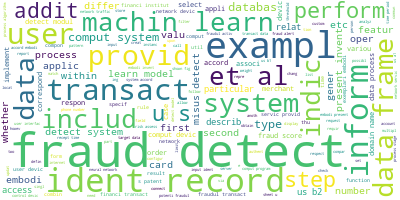

In [68]:
# Visualize the word cloud
wordcloud.to_image()

In [69]:
dict = corpora.Dictionary(list_stem_text)

In [70]:
# Create Corpus
texts = list_stem_text
# Term Document Frequency
corpus = [dict.doc2bow(text) for text in texts]

In [71]:
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 31), (3, 4), (4, 4), (5, 8), (6, 8), (7, 5), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 9), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 3)]


In [72]:
# number of topics
num_topics = 20

In [73]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dict,
                                       num_topics=num_topics)

In [74]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.023*"model" + 0.023*"data" + 0.020*"system" + 0.018*"second" + '
  '0.016*"network" + 0.014*"first" + 0.013*"detect" + 0.011*"comput" + '
  '0.011*"featur" + 0.010*"train"'),
 (1,
  '0.024*"data" + 0.021*"set" + 0.018*"first" + 0.017*"system" + 0.016*"user" '
  '+ 0.014*"action" + 0.013*"score" + 0.013*"comput" + 0.012*"ident" + '
  '0.012*"devic"'),
 (2,
  '0.022*"data" + 0.020*"vector" + 0.017*"action" + 0.014*"system" + '
  '0.013*"first" + 0.012*"url" + 0.010*"comput" + 0.009*"imag" + '
  '0.008*"processor" + 0.008*"oper"'),
 (3,
  '0.030*"detect" + 0.028*"system" + 0.019*"malwar" + 0.016*"fraud" + '
  '0.015*"devic" + 0.013*"user" + 0.012*"file" + 0.012*"model" + 0.012*"data" '
  '+ 0.011*"procedur"'),
 (4,
  '0.018*"first" + 0.017*"featur" + 0.015*"name" + 0.015*"system" + '
  '0.015*"inform" + 0.014*"devic" + 0.013*"sender" + 0.011*"domain" + '
  '0.011*"data" + 0.011*"stylometr"'),
 (5,
  '0.030*"call" + 0.020*"user" + 0.018*"model" + 0.017*"set" + 0.016*"detect" '
  

In [75]:
# Visualize the topics
pyLDAvis.enable_notebook()

In [76]:
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, dict)

C:\Users\pietr\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [77]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.051774  0.011330       1        1  13.202694
16     0.065749 -0.014665       2        1   9.563660
13    -0.043885  0.004597       3        1   7.840239
6      0.006706 -0.003662       4        1   7.523864
12    -0.026807  0.068367       5        1   7.243702
5      0.011212 -0.038261       6        1   6.865005
0      0.042257  0.009923       7        1   5.942958
17    -0.062699 -0.021644       8        1   5.201156
14     0.008966 -0.030917       9        1   4.819462
2     -0.003381  0.069706      10        1   4.728243
19    -0.000752  0.056819      11        1   4.099234
7      0.016746 -0.063793      12        1   3.948532
18    -0.030751 -0.032970      13        1   3.553397
4      0.011542  0.018759      14        1   3.352510
9      0.025059 -0.004597      15        1   2.565698
10     0.017695  0.006212      16        1   2.425131
3     -0.000588 -0.037450      17        1   2.327605
8     -0.093381  0.022156      18        1   2.314570
15     0.050265  0.027341      19        1   1.922464
11    -0.045728 -0.047249      20        1   0.559875, topic_info=        Term        Freq        Total Category  logprob  loglift
257  network  476.000000   476.000000  Default  30.0000  30.0000
226   domain  348.000000   348.000000  Default  29.0000  29.0000
155   system  859.000000   859.000000  Default  28.0000  28.0000
256     name  250.000000   250.000000  Default  27.0000  27.0000
91      imag  351.000000   351.000000  Default  26.0000  26.0000
..       ...         ...          ...      ...      ...      ...
405    train    1.366251   328.345530  Topic20  -5.3791  -0.2968
221     data    1.594084  1025.724992  Topic20  -5.2249  -1.2816
961     call    1.311760   278.381018  Topic20  -5.4198  -0.1724
249   malici    1.314487   285.788118  Topic20  -5.4178  -0.1966
81     fraud    1.316748   296.069632  Topic20  -5.4160  -0.2302

[1419 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
528      12  0.287603     104
528      13  0.287603     104
2         1  0.038265     120
2         3  0.076530     120
2         6  0.038265     120
...     ...       ...     ...
1444     16  0.103127  worker
1444     17  0.034376  worker
1444     19  0.068752  worker
1693      8  0.208173    wrap
1693     18  0.208173    wrap

[5991 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 17, 14, 7, 13, 6, 1, 18, 15, 3, 20, 8, 19, 5, 10, 11, 4, 9, 16, 12])

In [78]:
# Spacy

In [79]:
NER = spacy.load("en_core_web_trf")
NER.max_length = 1e20

In [80]:
i = 0
ner_result_sp = []
for line in list_text:
    ner_result_sp.append(NER(line))
    i +=1

C:\Users\pietr\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [81]:
i = 0
for line in list_text:
    print(line)
    i += 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [82]:
token_list_org = []
token_list_gpe = []

for result in ner_result_sp:
    for token in result.ents:
        if token.label_ == 'ORG' and token.text not in BusinessDictLib.forbidden_words_ner:
            token_list_org.append(token.text)
        if token.label_ == 'GPE': 
            token_list_gpe.append(token.text)
        

In [85]:
Counter(token_list_org).most_common(4)

[('Visa', 10), ('IBM', 8), ('Mastercard', 5), ('eBay', 3)]

In [84]:
Counter(token_list_gpe).most_common(50)

[('US', 74),
 ('U.S.', 22),
 ('CA', 21),
 ('San Diego', 14),
 ('IL', 12),
 ('NY', 8),
 ('OH', 7),
 ('FL', 6),
 ('MA', 6),
 ('WA', 5),
 ('Tokyo', 5),
 ('Osaka', 5),
 ('Bloomington', 5),
 ('GA', 5),
 ('China', 5),
 ('Chicago', 4),
 ('YASUSHI', 3),
 ('TX', 3),
 ('Alpharetta', 3),
 ('San Jose', 3),
 ('CT', 3),
 ('NJ', 3),
 ('OR', 3),
 ('SHIGETA', 2),
 ('Enes\nDenney', 2),
 ('AZ', 2),
 ('Fort Lauderdale', 2),
 ('Florida', 2),
 ('London', 2),
 ('Roseville', 2),
 ('Calif', 2),
 ('Orange County', 2),
 ('Torrance', 2),
 ('Santa Rosa', 2),
 ('Atlanta', 2),
 ('Dundee', 2),
 ('GB', 2),
 ('Armonk', 2),
 ('DE', 2),
 ('New York', 2),
 ('Shenzhen', 2),
 ('San Diego,', 2),
 ('San Diego, CA', 2),
 ('Los Alamos', 2),
 ('NM', 2),
 ('North Canton', 2),
 ('Colorado Springs', 2),
 ('Somerville', 2),
 ('Hoboken', 2),
 ('New Jersey', 2)]

State of the art analysis

In [ ]:
# we perform a State of the art analysis by identifying the main topics in scentific papaers in which
# research groups did surveys of all methods for fraud-detection using AI

In [4]:
# read the pdf files of the surveys

path =r"C:\Users\edoar\Desktop\Business And Project Management Project\State of the Art"
os.chdir(path)
list_surveys_texts = []

for file in os.listdir():
    file_path = f"{path}\{file}"
    with fitz.open(file) as doc:
        text = ""
        for page in doc:
            text += page.get_text() + " "
    list_surveys_texts.append(text)

<>:8: DeprecationWarning: invalid escape sequence \{
<>:8: DeprecationWarning: invalid escape sequence \{
C:\Users\edoar\AppData\Local\Temp/ipykernel_17892/1539772403.py:8: DeprecationWarning: invalid escape sequence \{
  file_path = f"{path}\{file}"


In [5]:
# put all the text into a single string
sample_text = ' '.join([str(elem) for elem in list_surveys_texts])

In [6]:
# all the text lower case
lower_text = sample_text.lower()

In [23]:
# removing whitespaces

lower_text = remove_whitespace(lower_text)

In [24]:
nltk.download('punkt')
tokenized_text = nltk.word_tokenize(lower_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\edoar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
#stop words filtering
from nltk.corpus import stopwords

stopwords_en = stopwords.words('english')


tokenized_text_filtered = []

for token in tokenized_text:
    # if a token is not a stopword, we insert it in the list
    if token not in stopwords_en:
        tokenized_text_filtered.append(token)

In [26]:
nltk.download('averaged_perceptron_tagger')
pos_tagging = nltk.pos_tag(tokenized_text_filtered)
cleaned_POS_text = []

for tuple in pos_tagging:
    # POS tagged text is a list of tuples, where the first element tuple[0] is a token and the second one tuple[1] is
    # the Part of Speech. If the POS has length == 1, the token is punctuation, otherwise it is not, and we insert it
    # in the list cleaned_POS_text
    if len(tuple[1]) > 1:
        cleaned_POS_text.append(tuple)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\edoar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [29]:
simpler_POS_text = []

# for each tuple of the list, we create a new tuple: the first element is the token, the second is
# the simplified pos tag, obtained calling the function simpler_pos_tag()
# then we append the new created tuple to a new list, which will be the output
for tuple in cleaned_POS_text:
    POS_tuple = (tuple[0], simpler_pos_tag(tuple[1]))
    simpler_POS_text.append(POS_tuple)

In [32]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

lemmatized_text = []

for tuple in simpler_POS_text:
    if (tuple[1] == None):
        lemmatized_text.append(lemmatizer.lemmatize(tuple[0]))
    else:
        lemmatized_text.append(lemmatizer.lemmatize(tuple[0], pos=tuple[1]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\edoar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
stemmer = PorterStemmer()
stem_text = []
for tuple in simpler_POS_text:
    stem_text.append(stemmer.stem(tuple[0]))

In [34]:
text_string = ' '.join([str(elem) for elem in stem_text])
text_string = re.sub('[^A-Za-z]+', ' ', text_string) 

# delete single letters
tmp = []

for word in text_string.split():
    if(len(word) > 1):
        tmp.append(word)
        
text_string_final = ' '.join([str(elem) for elem in tmp])

In [35]:
# performing a second stop-word filtering phase, this time the aim is to focus on state-of-the-art methods
# so also words that are frequent are escluded if they don't concern methods even if they're correlated, like "fraud". 
# Words which are papers-correlated like "doi" or "university" are also excluded.


other_words = ("et", "al", "od", "utc", "credit", "fraud", "detect", "http", "dx", "doi", "journal", "transaction", "financial", 
               "state", "of", "the", "art" , "preprint", "arxiv", "xplore", "ieee", "proof", "pre", "use", "short", "term", "memori",
              "th", "intern", "confer", "ci", "proc", "int", "conf", "data", "wang", "volum", "progress", "applic", "learn",
               "licens", "author", "univers", "download", "pisa", "restrict", "dataset", "problem")

text_string_final_filtered = ""

for word in text_string_final.split():
    if word not in other_words:
        text_string_final_filtered = text_string_final_filtered + " " + word

In [36]:
data_set = text
split_it = text_string_final_filtered.split()
CounterVariable  = Counter(split_it)
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = CounterVariable.most_common(50)
print(most_occur)

[('model', 2148), ('card', 1832), ('network', 1826), ('method', 1714), ('transact', 1499), ('techniqu', 1497), ('system', 1289), ('algorithm', 1284), ('base', 1120), ('neural', 1068), ('outlier', 982), ('comput', 967), ('approach', 960), ('research', 960), ('mine', 927), ('perform', 862), ('studi', 831), ('anomali', 828), ('deep', 813), ('result', 797), ('financi', 737), ('pp', 722), ('propos', 707), ('insur', 693), ('bas', 689), ('time', 685), ('class', 674), ('featur', 654), ('machin', 650), ('inform', 636), ('analysi', 619), ('fraudul', 611), ('set', 610), ('differ', 595), ('predict', 589), ('work', 587), ('classi', 586), ('one', 578), ('train', 557), ('classifi', 549), ('gener', 544), ('process', 538), ('survey', 526), ('type', 523), ('review', 507), ('also', 505), ('decis', 503), ('appli', 499), ('number', 497), ('real', 496)]


In [37]:
# most common bi-gram

bigrams = zip(text_string_final_filtered.split(), text_string_final_filtered.split()[1:])
counts = Counter(bigrams)
print(counts.most_common(15))

[(('neural', 'network'), 927), (('decis', 'tree'), 295), (('vol', 'pp'), 276), (('mine', 'techniqu'), 229), (('real', 'world'), 182), (('support', 'vector'), 181), (('logist', 'regress'), 179), (('fraudul', 'transact'), 165), (('automobil', 'insur'), 164), (('comput', 'scienc'), 163), (('card', 'transact'), 163), (('financi', 'statement'), 161), (('expert', 'system'), 157), (('vector', 'machin'), 149), (('random', 'forest'), 148)]


In [38]:
# the most used methods in the surveys about state of the art methods are identified using the most common 3-grams

ngram_counts = Counter(ngrams(text_string_final_filtered.split(), 3))
ngram_counts.most_common(15) 

[(('support', 'vector', 'machin'), 147),
 (('convolut', 'neural', 'network'), 100),
 (('deep', 'neural', 'network'), 92),
 (('hidden', 'markov', 'model'), 77),
 (('recurr', 'neural', 'network'), 61),
 (('decis', 'support', 'system'), 60),
 (('artifici', 'immun', 'system'), 51),
 (('artifici', 'neural', 'network'), 50),
 (('self', 'organ', 'map'), 48),
 (('class', 'imbal', 'method'), 46),
 (('gener', 'adversari', 'network'), 44),
 (('expert', 'syst', 'appl'), 42),
 (('bayesian', 'belief', 'network'), 39),
 (('vector', 'machin', 'svm'), 34),
 (('princip', 'compon', 'analysi'), 33)]

In [39]:
tri_gr = ngram_counts.most_common(15)

trigram_text = ""
for i in range(tri_gr[0][1]+tri_gr[13][1]):  #per il problema di sinonimia
    trigram_text = trigram_text + " " + "Support_Vector_Machine"
for i in range(tri_gr[1][1]):
    trigram_text = trigram_text + " " + "Convolutional_Neural_Network"
for i in range(tri_gr[2][1]):
    trigram_text = trigram_text + " " + "Deep_Neural_Network"
for i in range(tri_gr[3][1]):
    trigram_text = trigram_text + " " + "Hidden_Markov_Model"
for i in range(tri_gr[4][1]):
    trigram_text = trigram_text + " " + "Recurrent_Neural_Network"
for i in range(tri_gr[5][1]):
    trigram_text = trigram_text + " " + "Decision_Support_System"
for i in range(tri_gr[6][1]):
    trigram_text = trigram_text + " " + "Artificial_Immune_System"
for i in range(tri_gr[7][1]):
    trigram_text = trigram_text + " " + "Artificial_Neural_Network"
for i in range(tri_gr[8][1]):
    trigram_text = trigram_text + " " + "Self_Organizing_Maps"
for i in range(tri_gr[9][1]):
    trigram_text = trigram_text + " " + "Class_Imbalanced_Methods"
for i in range(tri_gr[10][1]):
    trigram_text = trigram_text + " " + "Generative_Adversarial_Network"
for i in range(tri_gr[11][1]):
    trigram_text = trigram_text + " " + "Expert_System_Application"
for i in range(tri_gr[12][1]):
    trigram_text = trigram_text + " " + "Bayesian_Belief_Network"
for i in range(tri_gr[14][1]):
    trigram_text = trigram_text + " " + "Principal_Component_Analysis"
    

In [40]:
# create a dictionary with name/occurrences and resolve the synonymy problem
dict_text = {'Support Vector Machine':tri_gr[0][1]+tri_gr[13][1], 'Convolutional Neural Network':tri_gr[1][1], 
            'Deep Neural Network':tri_gr[2][1], 'Hidden Markov Model':tri_gr[3][1], 'Recurrent Neural Network':tri_gr[4][1],
            'Decision Support System':tri_gr[5][1], 'Artificial Immune System':tri_gr[6][1], 
            'Artificial Neural Network':tri_gr[7][1], 'Self Organizing Maps':tri_gr[8][1], 
            'Class Imbalanced Methods':tri_gr[9][1], 'Generative Adversarial Network':tri_gr[10][1],
            'Expert System Application':tri_gr[11][1], 'Bayesian Belief Network':tri_gr[12][1],
            'Principal Component Analysis':tri_gr[14][1]}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

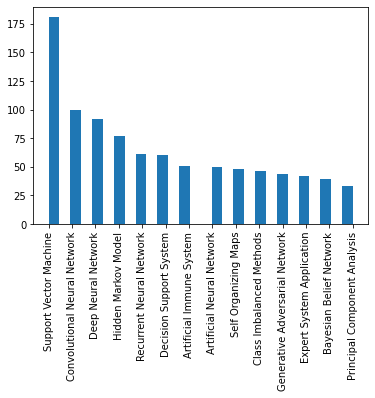

In [41]:
# plotting
import matplotlib.pyplot as plt
mylist = [key for key, val in dict_text.items() for _ in range(val)]
plt.hist(mylist, bins=28)
plt.xticks(rotation=90)
